This is my first attempt on this database, some parts of the kernel is based on Linus W. kernel, mostly how to access de data. It implements a very easy DNN achieving 96% of accuracy in the test set.
I hope that this can be helpful as a starting point for anyone in the future. I will try to improve it in future revisions.

In [2]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os


ModuleNotFoundError: No module named 'pandas'

In [3]:
#test
image = cv2.imread('ground-fuel-example1.jpg')
# print(image.shape)
# print(type(image))
image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


NameError: name 'cv2' is not defined

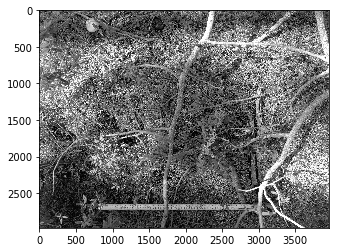

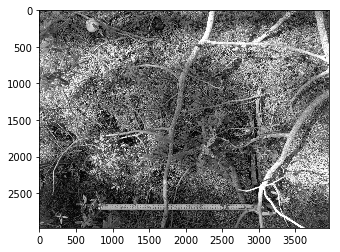

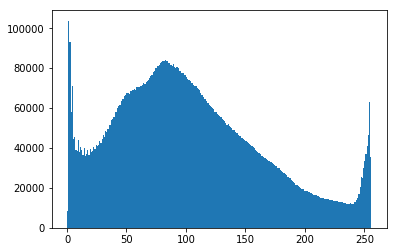

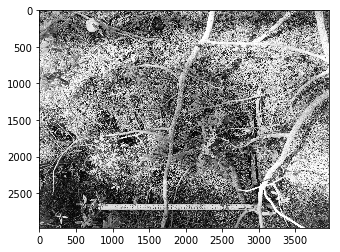

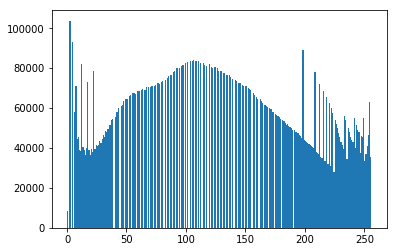

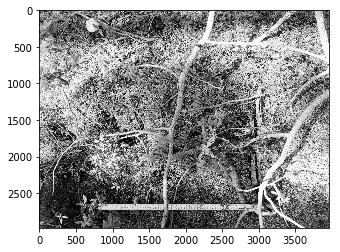

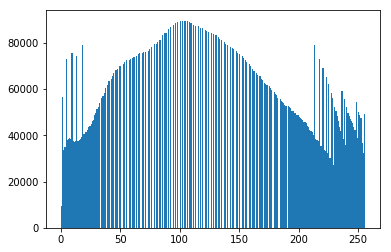

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray,'gray')
plt.show()

blur = cv2.GaussianBlur(image_gray,(5,5),0)
plt.imshow(blur,'gray')
plt.show()

#hisogram equalization
plt.hist(image_gray.ravel(),256,[0,256]); plt.show()
hist_equ = cv2.equalizeHist(image_gray)
plt.imshow(hist_equ,'gray')
plt.show()
plt.hist(hist_equ.ravel(),256,[0,256]); plt.show()

#hisogram equalization
blur_hist_equ = cv2.equalizeHist(blur)
plt.imshow(blur_hist_equ,'gray')
plt.show()
plt.hist(blur_hist_equ.ravel(),256,[0,256]); plt.show()

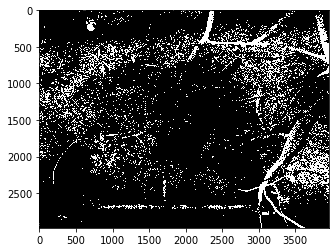

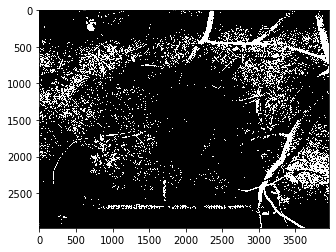

In [9]:

ret,image_thresh = cv2.threshold(hist_equ,220,255,cv2.THRESH_BINARY)
plt.imshow(image_thresh,'gray')
plt.show()


ret,image_thresh_blur = cv2.threshold(blur_hist_equ,220,255,cv2.THRESH_BINARY)
plt.imshow(image_thresh_blur,'gray')
plt.show()

In [10]:
# circles = cv2.HoughCircles(image_thresh_blur,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
# print(circles)
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv2.circle(image_thresh_blur,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv2.circle(image_thresh_blur,(i[0],i[1]),2,(0,0,255),3)

# cv2.imshow('detected circles',image_thresh_blur)
# plt.show()

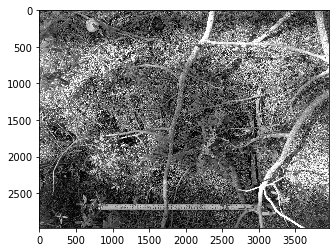

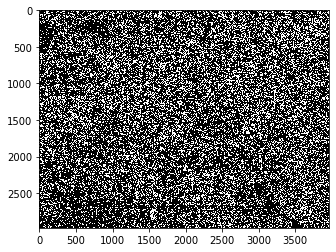

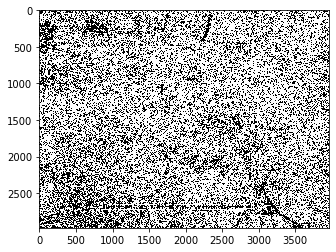

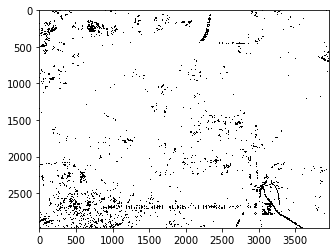

In [11]:
# edge detection
# plt.imshow(image_gray,'gray')
# plt.show()

# gray = cv2.Canny(image_gray, 50, 50)

# plt.imshow(gray,'gray')
# plt.show()

# kernel = np.ones((2,2), np.uint8)
# gray = cv2.dilate(gray, kernel, iterations=1)
# plt.imshow(gray,'gray')
# plt.show()

# kernel = np.ones((8,8), np.uint8)
# gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
# plt.imshow(gray, 'gray')
# plt.show()

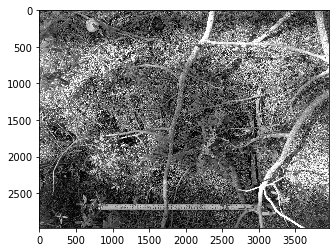

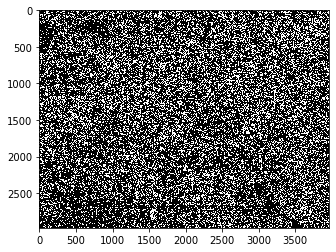

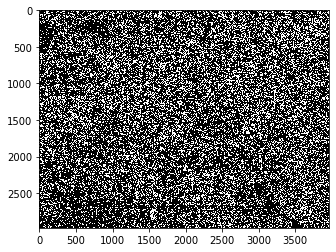

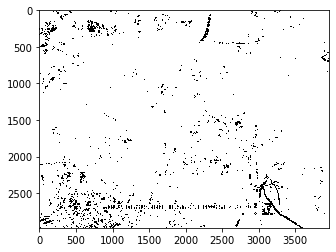

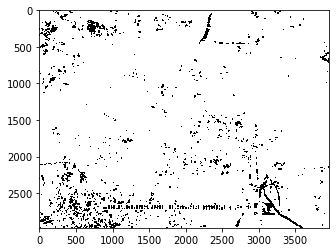

In [24]:
plt.imshow(image_gray,'gray')
plt.show()

gray = cv2.Canny(image_gray, 50, 50)

plt.imshow(gray,'gray')
plt.show()

kernel = np.ones((1,1), np.uint8)
gray = cv2.dilate(gray, kernel, iterations=2)
plt.imshow(gray,'gray')
plt.show()

# kernel = np.ones((2,2), np.uint8)
# opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
# plt.imshow(opening, 'gray')
# plt.show()


kernel = np.ones((10,10), np.uint8)
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
plt.imshow(gray, 'gray')
plt.show()



kernel = np.ones((2,2), np.uint8)
gray = cv2.erode(gray, kernel,iterations = 4)
plt.imshow(gray, 'gray')
plt.show()

14


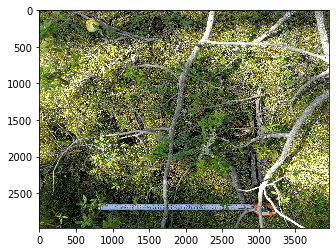

In [25]:

thresh = cv2.threshold(gray, 20, 200, cv2.THRESH_BINARY)[1]
_, cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
for c in cnts:
    # if the contour is too small, ignore it
    area = cv2.contourArea(c)

    if area < 500:
        continue
    # compute the bounding box for the contour, draw it on the frame,
    # and update the text
    (x, y, w, h) = cv2.boundingRect(c)
#     print(x,y,w,h)
#     print("next")
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('output.jpg', image)
# cv2.imshow('result', Frame)
# cv2.waitKey(0)
plt.imshow(image)
plt.show()



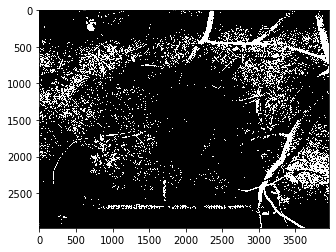

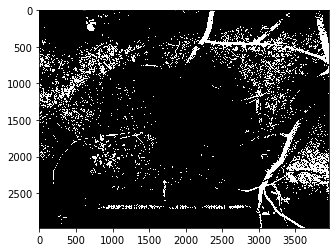

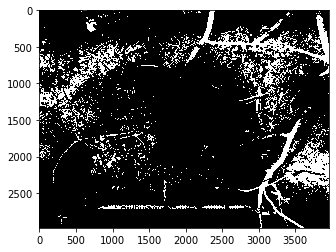

2249


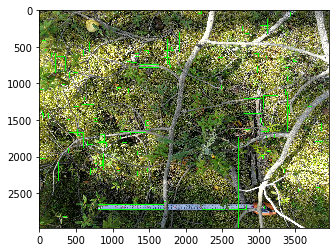

In [13]:
image_th = image.copy()

plt.imshow(image_thresh_blur, 'gray')
plt.show()

kernel = np.ones((4,4), np.uint8)
image_thresh_blur = cv2.morphologyEx(image_thresh_blur.copy(), cv2.MORPH_OPEN, kernel)
plt.imshow(image_thresh_blur, 'gray')
plt.show()

kernel = np.ones((10,10), np.uint8)
image_thresh_blur = cv2.morphologyEx(image_thresh_blur, cv2.MORPH_CLOSE, kernel)
plt.imshow(image_thresh_blur, 'gray')
plt.show()

thresh = cv2.threshold(image_thresh_blur, 20, 200, cv2.THRESH_BINARY)[1]
_, cnts, _ = cv2.findContours(image_thresh_blur, cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
for c in cnts:
    # if the contour is too small, ignore it
    area = cv2.contourArea(c)

    if area < 500:
    	continue
    # compute the bounding box for the contour, draw it on the frame,
    # and update the text
    (x, y, w, h) = cv2.boundingRect(c)

    cv2.rectangle(image_th, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('output.jpg', image_th)
# cv2.imshow('result', Frame)
# cv2.waitKey(0)
plt.imshow(image_th)
plt.show()

255


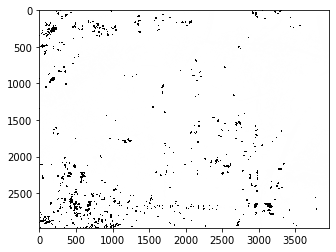

1


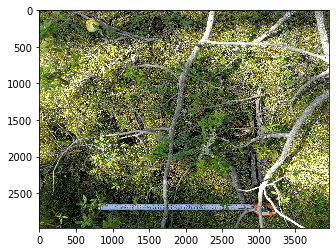

In [14]:
combine_img = np.add(image_thresh_blur,gray)
print(gray.max())
plt.imshow(combine_img, 'gray')
plt.show()


thresh = cv2.threshold(combine_img, 20, 200, cv2.THRESH_BINARY)[1]
_, cnts, _ = cv2.findContours(combine_img, cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
for c in cnts:
    # if the contour is too small, ignore it
    area = cv2.contourArea(c)

    if area < 500:
    	continue
    # compute the bounding box for the contour, draw it on the frame,
    # and update the text
    (x, y, w, h) = cv2.boundingRect(c)

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('output.jpg', image)
# cv2.imshow('result', Frame)
# cv2.waitKey(0)
plt.imshow(image)
plt.show()